# TFL - AccidentStats

* pip install requests pandas matplotlib python-dotenv

In [2]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

* ### load variables

In [3]:
load_dotenv()

True

* ### load keys

In [ ]:
APP_ID = os.getenv('APP_ID')
API_KEY = os.getenv('API_KEY')
YEAR = 2019

## fetch

* ### endpoint

In [47]:
url = f'https://api.tfl.gov.uk/AccidentStats/{YEAR}?app_id={APP_ID}&app_key={API_KEY}'

In [ ]:
response = requests.get(url)

if response.status_code == 200:
    accident_data = response.json()
    print(accident_data[:2])
else:
    print(f'Error: {response.status_code}, {response.text}')


[{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities', 'id': 345979, 'lat': 51.570865, 'lon': -0.231959, 'location': 'On Edgware Road Near The Junction With north Circular Road', 'date': '2019-01-04T21:22:00Z', 'severity': 'Slight', 'borough': 'Barnet', 'casualties': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Casualty, Tfl.Api.Presentation.Entities', 'age': 20, 'class': 'Driver', 'severity': 'Slight', 'mode': 'PoweredTwoWheeler', 'ageBand': 'Adult'}], 'vehicles': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities', 'type': 'Motorcycle_500cc_Plus'}, {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities', 'type': 'Car'}]}, {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities', 'id': 345980, 'lat': 51.603859, 'lon': -0.18724, 'location': 'On Willow Way Near The Junction With Long Lane', 'date': '20

In [ ]:

my_list = []

for accident in accident_data:
    date = accident['date']
    borough = accident['borough']
    lat = accident['lat']
    lon = accident['lon']
    severity = accident['severity']
    total_vehicles = len(accident['vehicles'])
    vehicles = [vehicle['type'] for (vehicle) in accident['vehicles']]

    my_list.append({
        'Date': date,
        'Borough': borough,
        'Severity': severity,
        'Vehicles Total': total_vehicles,
        'Vehicles Types': vehicles,
        'Latitude': lat,
        'Longitude': lon
    })

    #print(f'Date: {date}\n Borough: {borough}\n Severity: {severity}\n Vehicles Total: {total_vehicles} \n Vehicle Types: {vehicles}\n\n')


In [49]:
my_list[:2]

[{'Date': '2019-01-04T21:22:00Z',
  'Borough': 'Barnet',
  'Severity': 'Slight',
  'Vehicles Total': 2,
  'Vehicles Types': ['Motorcycle_500cc_Plus', 'Car'],
  'Latitude': 51.570865,
  'Longitude': -0.231959},
 {'Date': '2019-01-04T23:33:00Z',
  'Borough': 'Barnet',
  'Severity': 'Slight',
  'Vehicles Total': 3,
  'Vehicles Types': ['Motorcycle_50_125cc', 'Car', 'Car'],
  'Latitude': 51.603859,
  'Longitude': -0.18724}]

* ### create table

In [109]:
tfl_accident_df = pd.DataFrame(my_list)
tfl_accident_df.reset_index()
tfl_accident_df.head()

,Date,Borough,Severity,Vehicles Total,Vehicles Types,Latitude,Longitude
0,2019-01-04T21:22:00Z,Barnet,Slight,2,"[Motorcycle_500cc_Plus, Car]",51.570865,-0.231959
1,2019-01-04T23:33:00Z,Barnet,Slight,3,"[Motorcycle_50_125cc, Car, Car]",51.603859,-0.187240
2,2019-01-04T22:15:00Z,City of Westminster,Slight,1,[Car],51.512198,-0.153122
3,2019-01-04T18:00:00Z,Lewisham,Slight,2,"[Motorcycle_50_125cc, Car]",51.431480,-0.016083
4,2019-01-04T20:45:00Z,Bexley,Slight,2,"[Car, Car]",51.473487,0.145202


In [110]:
len(tfl_accident_df['Borough'].unique())

33

### 1. count per borough

In [114]:
borough_counts = tfl_accident_df['Borough'].value_counts().sort_values(ascending=False).rename('Total Accidents').reset_index()

borough_counts

,Borough,Total Accidents
0,City of Westminster,3032
1,Lambeth,2382
2,Tower Hamlets,2232
3,Southwark,2186
4,Ealing,1966
5,Croydon,1908
6,Barnet,1896
7,Enfield,1894
8,Wandsworth,1890
9,Camden,1838


### 2. severity per borough
    * unstack for columns per

In [115]:
borough_severity_group = tfl_accident_df.groupby(['Borough', 'Severity']).size().unstack(fill_value=0).reset_index()

borough_severity_group.head()

Severity,Borough,Fatal,Serious,Slight
0,Barking and Dagenham,8,160,1044
1,Barnet,8,270,1618
2,Bexley,6,136,808
3,Brent,12,220,1490
4,Bromley,12,190,1216


* ### merge 1 & 2 on Borough

In [116]:
accidents_sorted_df = pd.merge(borough_severity_group, borough_counts, on='Borough', how='inner')


accidents_sorted_df.head()

,Borough,Fatal,Serious,Slight,Total Accidents
0,Barking and Dagenham,8,160,1044,1212
1,Barnet,8,270,1618,1896
2,Bexley,6,136,808,950
3,Brent,12,220,1490,1722
4,Bromley,12,190,1216,1418


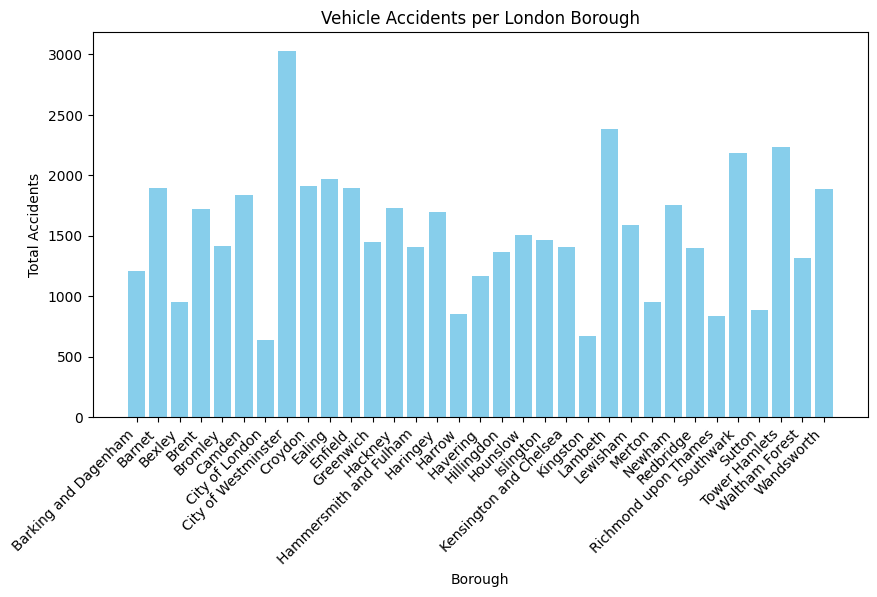

In [122]:
plt.figure(figsize=(10,5))
plt.bar(accidents_sorted_df["Borough"], accidents_sorted_df["Total Accidents"], color='skyblue')
plt.xlabel("Borough")
plt.ylabel("Total Accidents")
plt.title("Vehicle Accidents per London Borough")
plt.xticks(rotation=45, ha='right')
plt.show()